# Import Data & Libraries

In [27]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [28]:
matplotlib.__version__

'3.5.2'

In [29]:
# ensure charts are displayed in notebook

%matplotlib inline

In [30]:
# Define path

path = r'C:\Users\alexi\OneDrive\Gun Violence'

In [31]:
# import data

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'firstclean'))

# Clean Data

In [32]:
# Drop columns that I don't need for visualization

df.head()

,Unnamed: 0,incident_id,date,state,city_or_county,count_killed,count_injured,congressional_district,stolen_gun,gun_type,...,longitude,count_guns_involved,participant_age,participant_age_group,participant_gender,participant_relationship,participant_status,participant_type,state_house_district,state_senate_district
0,0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,...,-79.8559,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,NaN,NaN
1,1,460726,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,...,-118.3330,NaN,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,2,478855,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,3,478925,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,...,-104.8020,NaN,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,4,478959,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0


In [33]:
df = df.drop(columns = {'Unnamed: 0', 'incident_id', 'incident_characteristics', 'participant_age_group', 'participant_gender', 'participant_relationship', 'participant_status', 'participant_type', 'location_description'})

In [34]:
# create mass casualty flag

df.loc[df['count_killed'] >= 4, 'mass_casualty'] = 'YES'
df.loc[df['count_killed'] < 4, 'mass_casualty'] = 'NO'


In [35]:
# check frequency

df['mass_casualty'].value_counts (dropna = False)

NO     239470
YES       207
Name: mass_casualty, dtype: int64

In [36]:
# create mass shooting flag

df.loc[df['count_injured'] >= 4, 'mass_shooting'] = 'YES'
df.loc[df['count_injured'] < 4, 'mass_shooting'] = 'NO'

In [37]:
# check frequency

df['mass_shooting'].value_counts (dropna = False)

NO     238470
YES      1207
Name: mass_shooting, dtype: int64

In [38]:
def political_affiliation (column):
    if column['state'] == 'Alabama':
        return 'RED'
    elif column['state'] == 'Arkansas':
        return 'RED'
    elif column['state'] == 'Alaska':
        return 'RED'
    elif column['state'] == 'Arizona':
        return 'RED'
    elif column['state'] == 'Florida':
        return 'RED'
    elif column['state'] == 'Georgia':
        return 'RED'
    elif column['state'] == 'Idaho':
        return 'RED'
    elif column['state'] == 'Indiana':
        return 'RED'
    elif column['state'] == 'Iowa':
        return 'RED'
    elif column['state'] == 'Kansas':
        return 'RED'
    elif column['state'] == 'Kentucky':
        return 'RED'
    elif column['state'] == 'Louisiana':
        return 'RED'
    elif column['state'] == 'Michigan':
        return 'RED'
    elif column['state'] == 'Mississippi':
        return 'RED'
    elif column['state'] == 'Missouri':
        return 'RED'
    elif column['state'] == 'Montana':
        return 'RED'
    elif column['state'] == 'Nebraska':
        return 'RED'
    elif column['state'] == 'North Carolina':
        return 'RED'
    elif column['state'] == 'North Dakota':
        return 'RED'
    elif column['state'] == 'Arkansas':
        return 'RED'
    elif column['state'] == 'Ohio':
        return 'RED'
    elif column['state'] == 'Oklahoma':
        return 'RED'
    elif column['state'] == 'South Carolina':
        return 'RED'
    elif column['state'] == 'South Dakota':
        return 'RED'
    elif column['state'] == 'Tennessee':
        return 'RED'
    elif column['state'] == 'Texas':
        return 'RED'
    elif column['state'] == 'Utah':
        return 'RED'
    elif column['state'] == 'West Virginia':
        return 'RED'
    elif column['state'] == 'Wisconsin':
        return 'RED'
    elif column['state'] == 'Wyoming':
        return 'RED'
    else: return 'BLUE'

In [39]:
df['red_state'] = df.apply(political_affiliation, axis=1)

In [40]:
df['red_state'].value_counts()

RED     137659
BLUE    102018
Name: red_state, dtype: int64

In [41]:
df.head()

,date,state,city_or_county,count_killed,count_injured,congressional_district,stolen_gun,gun_type,latitude,longitude,count_guns_involved,participant_age,state_house_district,state_senate_district,mass_casualty,mass_shooting,red_state
0,2013-01-01,Pennsylvania,Mckeesport,0,4,14.0,NaN,NaN,40.3467,-79.8559,NaN,0::20,NaN,NaN,NO,YES,BLUE
1,2013-01-01,California,Hawthorne,1,3,43.0,NaN,NaN,33.9090,-118.3330,NaN,0::20,62.0,35.0,NO,NO,BLUE
2,2013-01-01,Ohio,Lorain,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,56.0,13.0,NO,NO,RED
3,2013-01-05,Colorado,Aurora,4,0,6.0,NaN,NaN,39.6518,-104.8020,NaN,0::29||1::33||2::56||3::33,40.0,28.0,YES,NO,BLUE
4,2013-01-07,North Carolina,Greensboro,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,62.0,27.0,NO,NO,RED


In [42]:
df.describe()

,count_killed,count_injured,congressional_district,latitude,longitude,count_guns_involved,state_house_district,state_senate_district
count,239677.000000,239677.000000,227733.000000,231754.000000,231754.000000,140226.000000,200905.000000,207342.00000
mean,0.252290,0.494007,8.001265,37.546598,-89.338348,1.372442,55.447132,20.47711
std,0.521779,0.729952,8.480835,5.130763,14.359546,4.678202,42.048117,14.20456
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.00000
25%,0.000000,0.000000,2.000000,33.903400,-94.158725,1.000000,21.000000,9.00000
50%,0.000000,0.000000,5.000000,38.570600,-86.249600,1.000000,47.000000,19.00000
75%,0.000000,1.000000,10.000000,41.437375,-80.048625,1.000000,84.000000,30.00000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.00000


In [43]:
df['count_guns_involved'].value_counts()

1.0      127548
2.0        7477
3.0        2021
4.0         871
5.0         435
          ...  
158.0         1
189.0         1
85.0          1
96.0          1
127.0         1
Name: count_guns_involved, Length: 106, dtype: int64

In [44]:
# select columns for visualizations
df.columns


Index(['date', 'state', 'city_or_county', 'count_killed', 'count_injured',
       'congressional_district', 'stolen_gun', 'gun_type', 'latitude',
       'longitude', 'count_guns_involved', 'participant_age',
       'state_house_district', 'state_senate_district', 'mass_casualty',
       'mass_shooting', 'red_state'],
      dtype='object')

In [45]:
# create subset

sub = df[['count_killed', 'count_injured', 'congressional_district', 'latitude', 'longitude', 'count_guns_involved', 'state_house_district', 'state_senate_district']]

# Exploring Relationships

## Correlations

In [46]:
# Create a correlation matrix using pandas

sub.corr()

,count_killed,count_injured,congressional_district,latitude,longitude,count_guns_involved,state_house_district,state_senate_district
count_killed,1.000000,-0.125425,0.055545,-0.080078,-0.062149,-0.028200,-0.006015,-0.010650
count_injured,-0.125425,1.000000,-0.007636,-0.011379,0.036962,-0.038843,-0.030355,-0.044294
congressional_district,0.055545,-0.007636,1.000000,-0.259488,-0.215606,0.021249,0.228827,0.309116
latitude,-0.080078,-0.011379,-0.259488,1.000000,-0.056713,-0.001341,-0.237958,0.028611
longitude,-0.062149,0.036962,-0.215606,-0.056713,1.000000,-0.016107,0.236450,0.113408
count_guns_involved,-0.028200,-0.038843,0.021249,-0.001341,-0.016107,1.000000,-0.003324,0.004247
state_house_district,-0.006015,-0.030355,0.228827,-0.237958,0.236450,-0.003324,1.000000,0.431299
state_senate_district,-0.010650,-0.044294,0.309116,0.028611,0.113408,0.004247,0.431299,1.000000


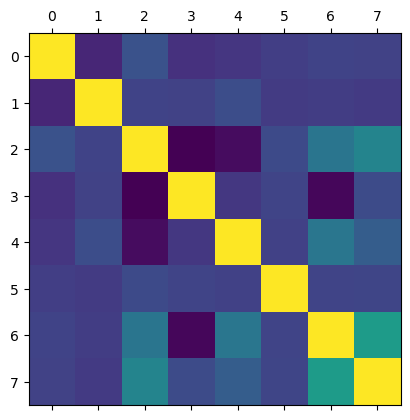

In [47]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

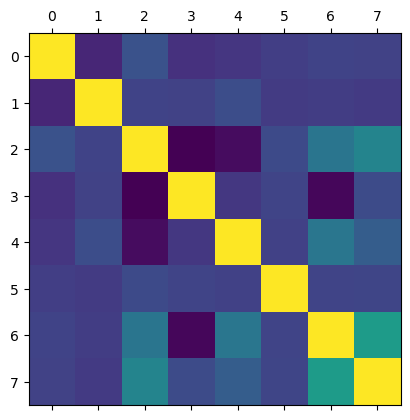

In [48]:
# Save figure
plt.matshow(sub.corr())
plt.savefig("out.png") 

Text(0.5, 1.0, 'Correlation Matrix')

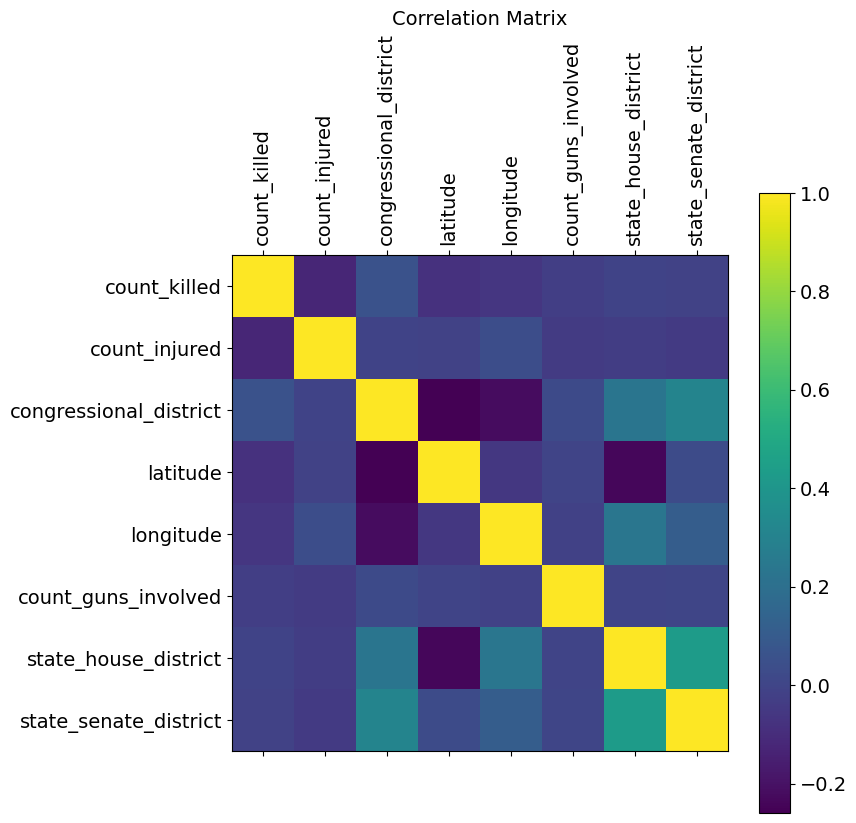

In [49]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

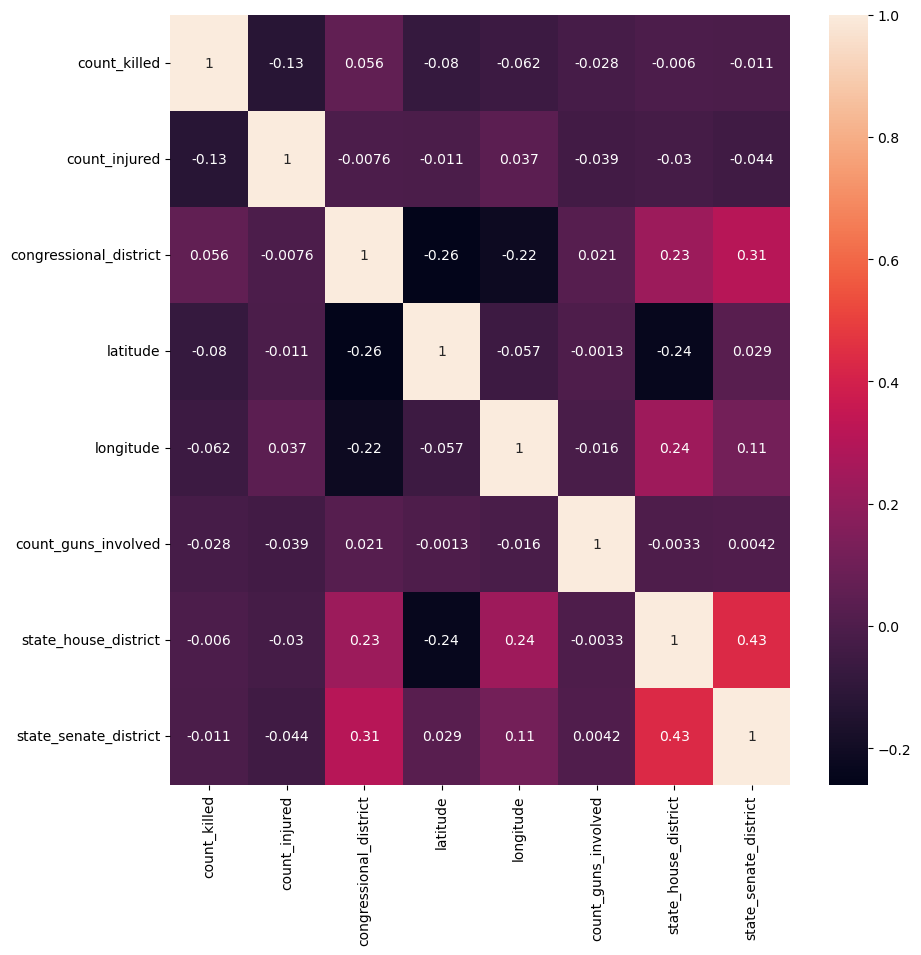

In [50]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

These correlation heat maps are showing that there is very weak correlations between the variables.

## Scatterplots

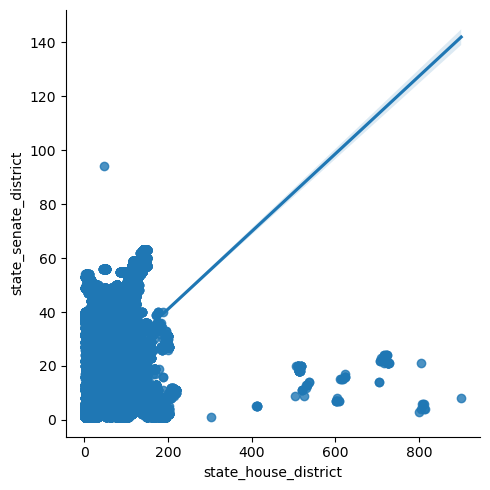

In [51]:
# Create a scatterplot for columns in seaborn

sns.lmplot(x = 'state_house_district', y = 'state_senate_district', data = df)

Again, this means virtually nothing. State house and senate district numbers have nothing to do with each other and only have a higher coefficient because they are always matched together in each record that happened in that part of whatever state.

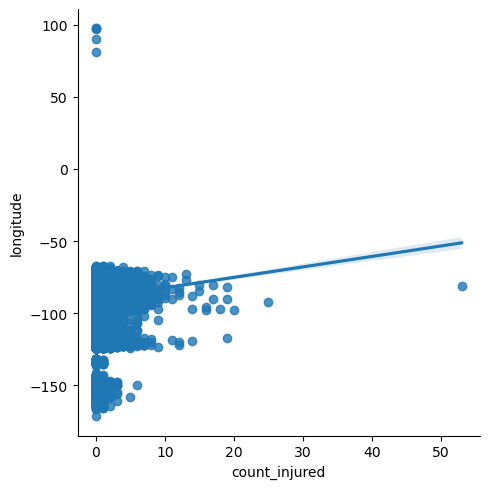

In [52]:
# Create a scatterplot for columns in seaborn

sns.lmplot(x = 'count_injured', y = 'longitude', data = df)

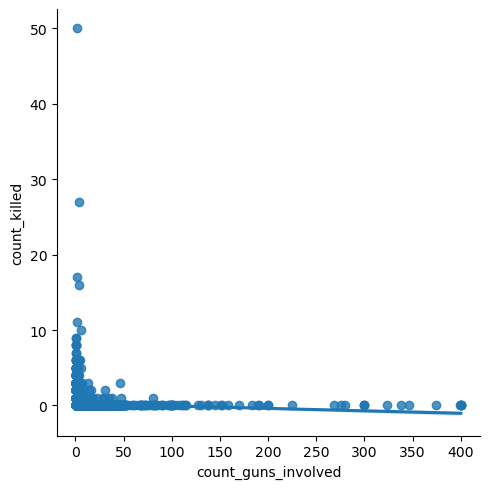

In [53]:
# Create a scatterplot for columns in seaborn

sns.lmplot(x = 'count_guns_involved', y = 'count_killed', data = df)

These scatter plots show that there is not a relationship between amount of guns involved and the count of people killed/injured.

## Pair Plots

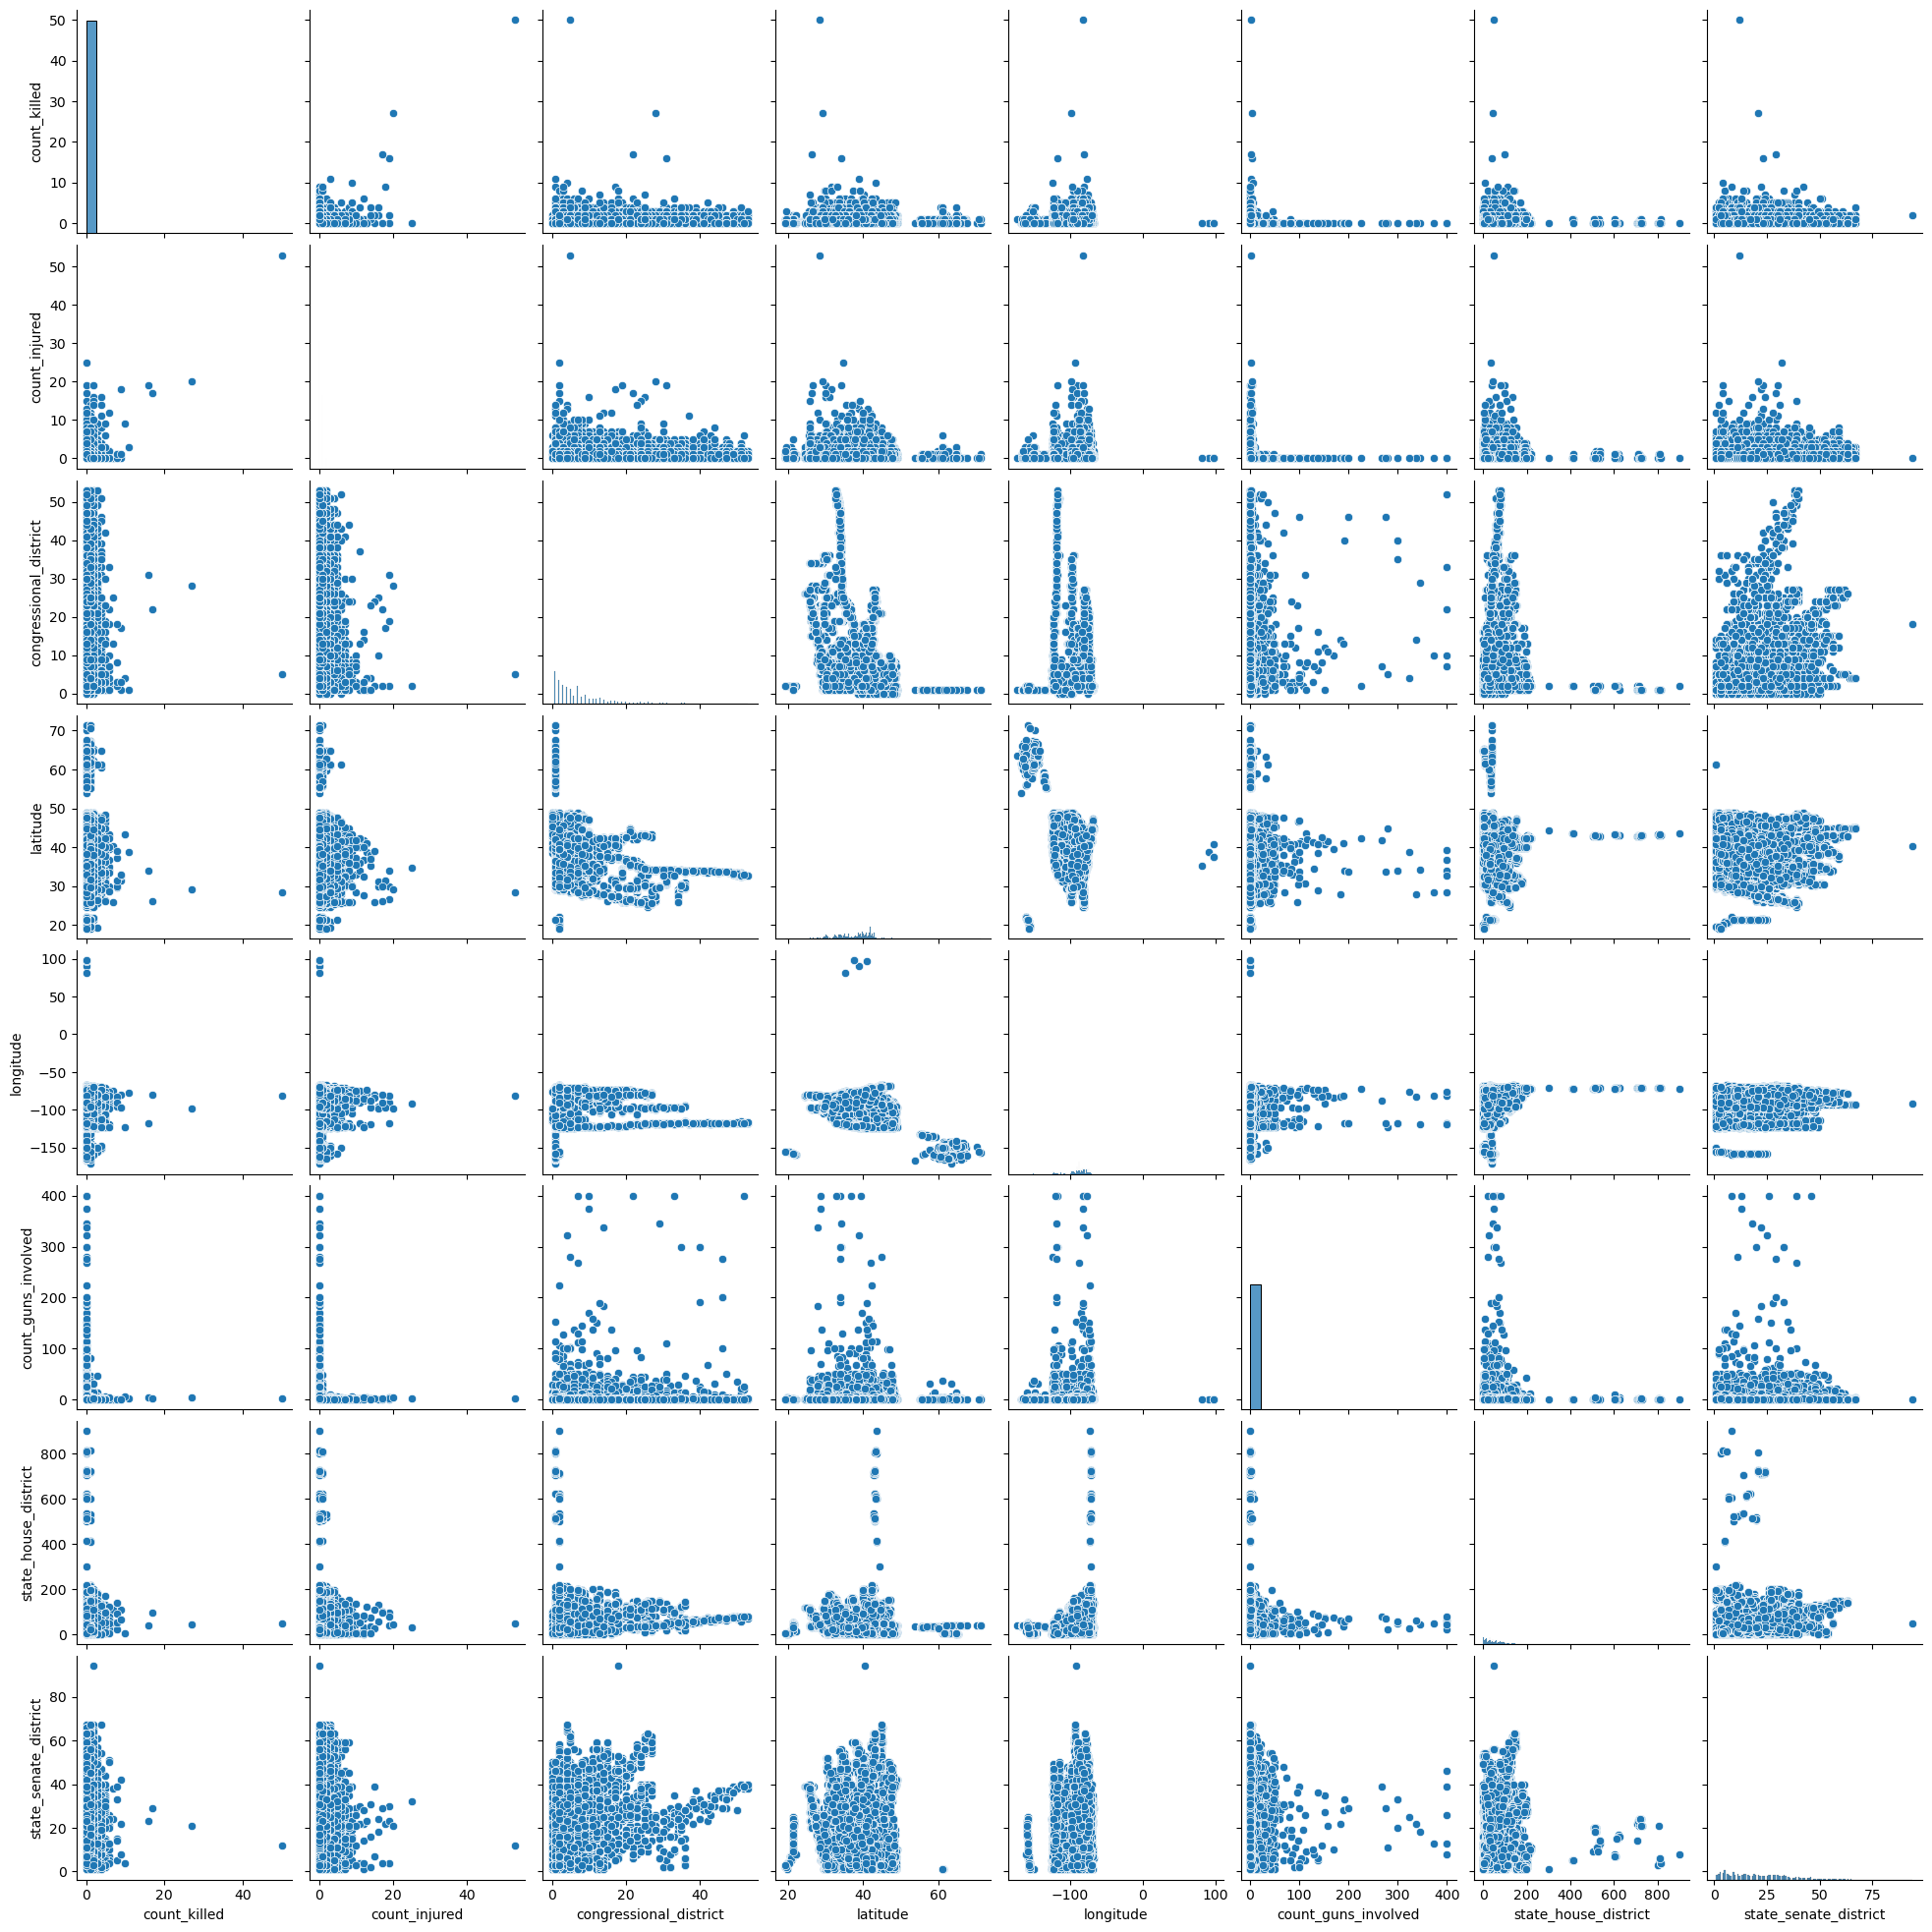

In [54]:
# Create a pair plot 

g = sns.pairplot(df)

I'd like to further explore the relationship between longitude and count_killed and latitude and count_killed to find out if there are more mass shootings in certain parts of the country. A lot of what I want to further investigate is not shown on these charts. I want to dive deeper into population and political affiliation of where shootings occur.

## Categorical Plots

In [55]:
df['count_killed'].dtype

dtype('int64')

<AxesSubplot:xlabel='count_killed', ylabel='Count'>

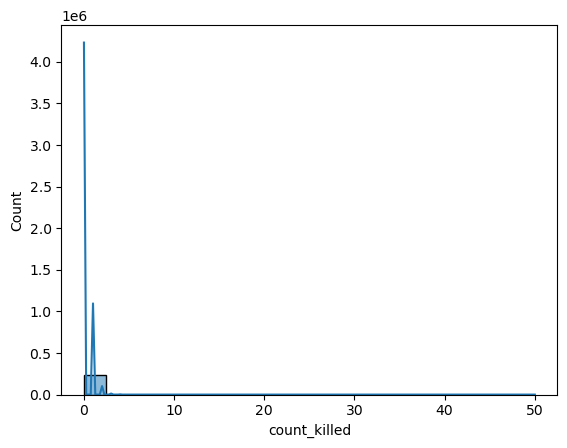

In [56]:
sns.histplot(df['count_killed'], bins = 20, kde = True)

In [57]:
df.loc[df['count_killed'] <= 3, 'kill_count'] = 'Low'

In [58]:
df.loc[(df['count_killed'] >= 4) & (df['count_killed'] < 8), 'kill_count'] = 'Medium'

In [59]:
df.loc[df['count_killed'] >=8, 'kill_count'] = 'High'

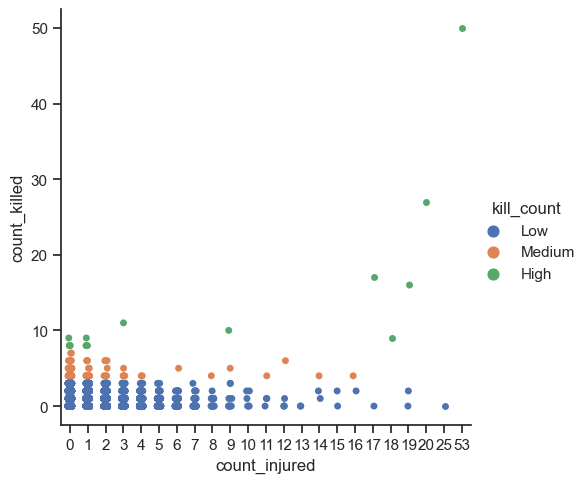

In [60]:
# Create a categorical plot in seaborn 

sns.set(style="ticks")
g = sns.catplot(x="count_injured", y="count_killed", hue="kill_count", data=df)

In [61]:
# fig = g.get_figure()
g.savefig("out.png") 

The questions from the last task were not able to be answered with these visualizations. The answers I need focus on categorical data.

In [62]:
df.isnull().sum()

date                          0
state                         0
city_or_county                0
count_killed                  0
count_injured                 0
congressional_district    11944
stolen_gun                99498
gun_type                  99451
latitude                   7923
longitude                  7923
count_guns_involved       99451
participant_age           92298
state_house_district      38772
state_senate_district     32335
mass_casualty                 0
mass_shooting                 0
red_state                     0
kill_count                    0
dtype: int64

In [63]:
df = df.drop(columns = {'count_guns_involved', 'congressional_district', 'stolen_gun', 'gun_type', 'participant_age', 'state_house_district', 'state_senate_district'})

In [64]:
df.isnull().sum()

date                 0
state                0
city_or_county       0
count_killed         0
count_injured        0
latitude          7923
longitude         7923
mass_casualty        0
mass_shooting        0
red_state            0
kill_count           0
dtype: int64

In [65]:
df_2 = df.dropna(subset=['latitude'])

In [66]:
df_2.isnull().sum()

date              0
state             0
city_or_county    0
count_killed      0
count_injured     0
latitude          0
longitude         0
mass_casualty     0
mass_shooting     0
red_state         0
kill_count        0
dtype: int64

# Export

In [67]:
df.to_csv(os.path.join(path, 'Data','Prepared Data', 'flagged_data.csv'))

In [68]:
df_2.to_csv(os.path.join(path, 'Data','Prepared Data', 'final_prep.csv'))